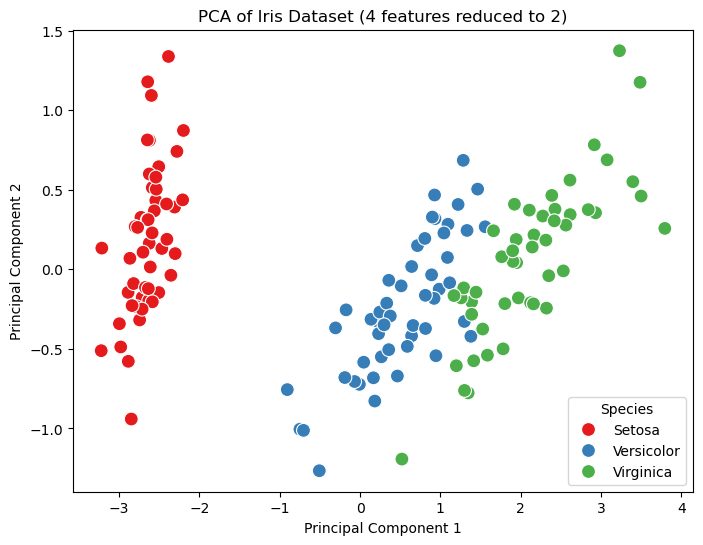

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding target variable (species)

# Step 2: Perform PCA to reduce the dimensionality from 4 features to 2
def apply_pca(df, n_components=2):
    # Extracting the features (X) and target (y)
    X = df.iloc[:, :-1].values  # All columns except the target
    y = df.iloc[:, -1].values   # Target (species)

    # Initialize PCA with the desired number of components (2 in this case)
    pca = PCA(n_components)

    # Fit and transform the data
    principal_components = pca.fit_transform(X)

    # Convert the principal components to a DataFrame
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['target'] = y  # Add target variable (species) to the dataframe
    return pca_df

# Step 3: Visualize the results
def visualize_pca(pca_df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='target', palette='Set1', data=pca_df, s=100)
    plt.title('PCA of Iris Dataset (4 features reduced to 2)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    handles,labels=plt.gca().get_legend_handles_labels()
    labels=['Setosa','Versicolor','Virginica']
    plt.legend(handles,labels,title='Species')
    plt.show()

# Step 4: Running the program
pca_df = apply_pca(df)
visualize_pca(pca_df)